![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
print(bikes.groupby('workingday').total.mean())
print("Tabla de frecuencia")
print(bikes.workingday.value_counts())
print("usando describe por total y working day")
print(bikes[bikes.workingday == 1].total.describe())
print("usando describe por total y working day")
print(bikes[bikes.workingday == 0].total.describe())

# Al observar el promedio del número de bicicletas rentadas comparando los días laborales con los días festivos la diferencia entre el 
# parece resultar baja.
# realizando un zoom, se puede observar la frecuencia de datos observando más del doble de observaciones para días labores comparados
# con no laborales, lo que parece indicar que el uso de la bicicleta es extendido independientemente de si es día laboral o no. Se pueden
# observar cuartiles similares entre estas clases con dispersiones que comparten esta similitud.

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64
Tabla de frecuencia
1    7412
0    3474
Name: workingday, dtype: int64
usando describe por total y working day
count    7412.000000
mean      193.011873
std       184.513659
min         1.000000
25%        41.000000
50%       151.000000
75%       277.000000
max       977.000000
Name: total, dtype: float64
usando describe por total y working day
count    3474.000000
mean      188.506621
std       173.724015
min         1.000000
25%        44.000000
50%       128.000000
75%       304.000000
max       783.000000
Name: total, dtype: float64


In [5]:
# Celda 1.2
print(bikes.groupby('hour').total.mean())

# Para la variable hour basta con la instrucción group by que nos permite observar las horas pico y valle de renta de bicicletas
# se puede observar un alto volumen de rentas promedio en las horas de salida de trabajo (5,6) Pm y la hora de entrada 8 Am, por otra
# parte se puede observar que el numero de rentas promedio aumenta de 2 a 5 Pm lo que podría reforzar la hipotésis que los usuarios pueden
# retornar al hogar usando la bicicleta como medio de trasnporte.
# otro apsecto importante a resaltar es que las 24 horas del día presentan rentas de bicicletas, auqnue como es de esperar, las horas
# de la madrugada presentas los niveles más bajos de renta promedio.

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

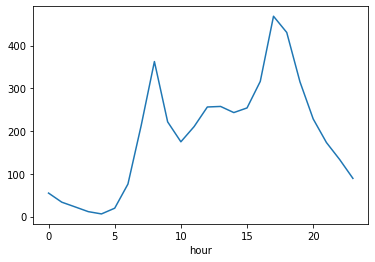

In [23]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:title={'center':'Día laboral'}, xlabel='hour'>

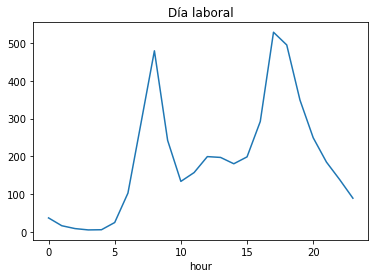

In [6]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday==1].groupby('hour').total.mean().plot(title="Día laboral")

# como se puede observar los días laborales presentan mayor volumen de rentas promedio en las horas de entrada y salida del trabajo


<AxesSubplot:title={'center':'Fin de Semana o Festivo'}, xlabel='hour'>

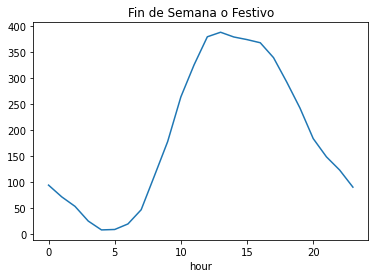

In [7]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes.workingday==0].groupby('hour').total.mean().plot(title="Fin de Semana o Festivo")

# para los fines de semana el volumen promedio de rentas parece incrementarse a medida que avanza la mañana, emézando a disminuir al 
# medio día. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [40]:
# Celda 3
from sklearn.metrics import mean_squared_error
X = bikes[["hour","workingday"]]
y = bikes.total
lr_model = LinearRegression()
lr_model.fit(X,y)
lr_pred = lr_model.predict(X)
lr_MSE = mean_squared_error(y_true=y, y_pred=lr_pred)
print("coef_horas: ",lr_model.coef_[0])
print("coef_workingday: ",lr_model.coef_[1])
print("R2: ",lr_model.score(X,y))
print("MSE: ", lr_MSE)

# Los coeficientes obtenidos nos indican que por cada incremento de una hora en promedio se rentarán 10 bicicletas más, por otra parte si
#  es un día laboral se rentarán 4 bicicletas más en promedio.
# Las limitaciones del enfoque lineal se hacen evidentes al observar la relación entre las rentas promedio por hora, ya que esta demuestra
# un comportamieto no lineal más ajustable a un polinomio de orden 3, lo cual implicará un costo alto entre el trade off de sesgo varianza
# al presentar alto sesgo, esto se puede evidenciar con más detalle al observar la bondad de ajuste del modelo.



coef_horas:  10.49206282289374
coef_workingday:  4.072486272904374
R2:  0.16059115011434855
MSE:  27541.255252498402


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [39]:
# Celda 4
# definiendo funciones, ahora el criterio de selección no es el Gini sino la varianza daod a que es un caso de regresión.
from statistics import variance
def vari(y):
    if y.shape[0] == 0:
        return 0
    else:
        return variance(y)

########################################################################################
# en esta función calcularemos la impureza de la varianza
def var_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    var_y = vari(y)
    var_l = vari(y_l)
    var_r = vari(y_r)
    
    var_impurity_ = var_y - (n_l / (n_l + n_r) * var_l + n_r / (n_l + n_r) * var_r)
    
    return var_impurity_

#########################################################################################

def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = var_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

##################################################################################################

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, gain=0) # ya no necesitamos probabilidades
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción, en este caso la predicción será la media del split con menor impureza
    y_pred = int(y.mean()) 
    #y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace no aplíca en este caso
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

########################################################################################################

def tree_predict(X, tree):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        # if not proba:
        predicted = predicted * tree['y_pred']
        # else:
        #     predicted = predicted * tree['y_prob'] no es necesario para este caso
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted

#####################################################################################################

# Calculando árbol con las variables hour y workingday como input y total como output

tree = tree_grow(bikes[["hour","workingday"]], bikes.total, level=0, min_gain=0.001, max_depth=6, num_pct=10)
preds = tree_predict(bikes[["hour","workingday"]], tree)
print(len(preds))
print(preds)
print("MSE: ", mean_squared_error(y_true=bikes.total,y_pred=preds))

# al obsercar el MSE de ambos modelos, se puede evidenciar una notoria reducción de este a realizar el calculo con el arbol de regresión, 
# pasando de un MSE de 27541 a uno de 11549, lo que implica una reducción de más de la mitad.



10886
[ 94.  71.  53. ... 184. 138.  89.]
11549.81728826015


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [48]:
# Celda 5

DTR = DecisionTreeRegressor(max_depth=8, random_state=0)
DTR.fit(bikes[["hour","workingday"]], bikes.total)
DTR_pred = DTR.predict(bikes[["hour","workingday"]])
print("MSE: ",mean_squared_error(y_true=bikes.total,y_pred=DTR_pred))

# nuevamente podemos observar que los resultados son muy similares al modelo 4 y por consiguiente eldesempeño del MSE comparado con el modelo
# punto 3 es significativamente mejor, pudiendo observar nuevamente una reducción de más de la mitad del MSE.

MSE:  11334.816493059323


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [49]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [50]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [54]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

1    0.5
0    0.5
Name: Popular, dtype: float64
avg lor_reg accuracy:  0.6193333333333333
avg log_reg f1_score:  0.6191153485732932
avg DT accuracy  0.5493333333333333
avg DT f1_score  0.5593954357181327
**************************************************************************
después de optimización
avg DT accuracy  0.6466666666666667
avg DT f1_score  0.6614362993813206


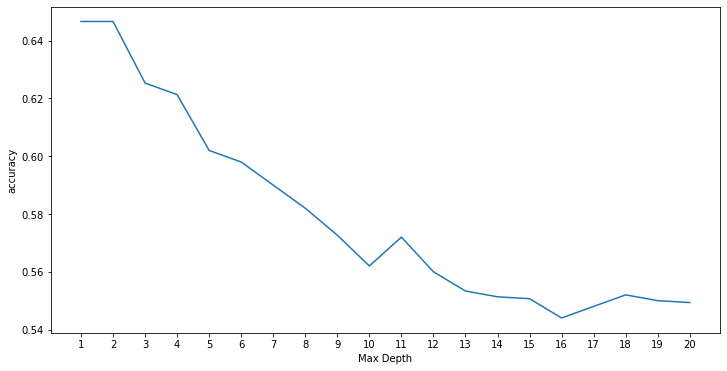

In [96]:
# Celda 6
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
# validando el balanceo de clases en el juego de datos completo
print(y.value_counts(normalize=True))
  
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_scores_1 = cross_val_score(log_reg, X=X_test, y= y_test, cv=10,n_jobs=-1, scoring="accuracy")
print("avg lor_reg accuracy: ", np.mean(log_reg_scores_1))
log_reg_scores_2 = cross_val_score(log_reg, X=X_test, y= y_test, cv=10,n_jobs=-1, scoring="f1")
print("avg log_reg f1_score: ", np.mean(log_reg_scores_2)) 

DTR_2 = DecisionTreeClassifier(random_state=1)
DTR_2.fit(X_train, y_train)
DTR_2_sores_1 = cross_val_score(DTR_2, X_test, y_test, cv=10, n_jobs=-1, scoring="accuracy")
print("avg DT accuracy ", np.mean(DTR_2_sores_1))
DTR_2_sores_2 = cross_val_score(DTR_2, X_test, y_test, cv=10, n_jobs=-1, scoring="f1")
print("avg DT f1_score ",np.mean(DTR_2_sores_2) )

# optimizando max_depth

list_accuracy = []
list_f1 = []
for i in range(1,21):
    DTR_2 = DecisionTreeClassifier(max_depth=i, random_state=1)
    list_accuracy.append(np.mean(cross_val_score(DTR_2, X_test, y_test, cv=10, n_jobs=-1, scoring="accuracy")))
    list_f1.append(np.mean(cross_val_score(DTR_2, X_test, y_test, cv=10, n_jobs=-1, scoring="f1")))

plt.figure(figsize=(12,6))
plt.plot(range(1,21), list_accuracy)
plt.xlabel("Max Depth")
plt.ylabel("accuracy")
_=plt.xticks(range(1,21))

DTR_2 = DecisionTreeClassifier(max_depth=1, random_state=1)
DTR_2.fit(X_train, y_train)
print("**************************************************************************")
print("después de optimización")
DTR_2_sores_1 = cross_val_score(DTR_2, X_test, y_test, cv=10, n_jobs=-1, scoring="accuracy")
print("avg DT accuracy ", np.mean(DTR_2_sores_1))
DTR_2_sores_2 = cross_val_score(DTR_2, X_test, y_test, cv=10, n_jobs=-1, scoring="f1")
print("avg DT f1_score ",np.mean(DTR_2_sores_2) )




### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [92]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

DTR_none = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)
DTR_none.fit(X_train, y_train)
DTR_none_sores_1 = cross_val_score(DTR_none, X_test, y_test, cv=10, n_jobs=-1, scoring="accuracy")
print("avg DT_none accuracy ", np.mean(DTR_none_sores_1))
DTR_none_sores_2 = cross_val_score(DTR_none, X_test, y_test, cv=10, n_jobs=-1, scoring="f1")
print("avg DT_none f1_score ",np.mean(DTR_none_sores_2) )

print("*************************************************************************************")

DTR_md2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)
DTR_md2.fit(X_train, y_train)
DTR_md2_sores_1 = cross_val_score(DTR_md2, X_test, y_test, cv=10, n_jobs=-1, scoring="accuracy")
print("avg DT_md2 accuracy ", np.mean(DTR_md2_sores_1))
DTR_md2_sores_2 = cross_val_score(DTR_md2, X_test, y_test, cv=10, n_jobs=-1, scoring="f1")
print("avg DT_md2 f1_score ",np.mean(DTR_md2_sores_2) )

print("***************************************************************************************")

log_reg_1 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)
log_reg_1.fit(X_train, y_train)
log_reg_1_sores_1 = cross_val_score(log_reg_1, X_test, y_test, cv=10, n_jobs=-1, scoring="accuracy")
print("avg log_reg_1 accuracy ", np.mean(log_reg_1_sores_1))
log_reg_1_sores_2 = cross_val_score(log_reg_1, X_test, y_test, cv=10, n_jobs=-1, scoring="f1")
print("avg log_reg_1 f1_score ",np.mean(log_reg_1_sores_2) )

avg DT_none accuracy  0.6546666666666666
avg DT_none f1_score  0.6656860769837463
*************************************************************************************
avg DT_md2 accuracy  0.656
avg DT_md2 f1_score  0.6726829457913082
***************************************************************************************
avg log_reg_1 accuracy  0.612
avg log_reg_1 f1_score  0.6104356901995418


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [98]:
# Celda 8
# en este caso podemos reutilizar los clasificadores elaborados en el punto anterior, solo resta aplicar el metodo de votación ponderada.

errors = np.zeros(DTR_none.n_estimators)
DTR_none_pred_all_ = np.zeros((X_test.shape[0], DTR_none.n_estimators))

for i in range(DTR_none.n_estimators):
    oob_sample = ~DTR_none.estimators_samples_[i]
    DTR_none_pred_ = DTR_none.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(DTR_none_pred_, y_train.values[oob_sample])
    DTR_none_pred_all_[:, i] = DTR_none.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
DTR_none_pred = (np.sum(DTR_none_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("DTR_none votación ponderada accuracy ",metrics.accuracy_score(DTR_none_pred, y_test))
print("DTR_none votación ponderada f1 score ",metrics.f1_score(DTR_none_pred, y_test))

print("***************************************************************************************")

errors = np.zeros(DTR_md2.n_estimators)
DTR_md2_pred_all_ = np.zeros((X_test.shape[0], DTR_md2.n_estimators))

for i in range(DTR_md2.n_estimators):
    oob_sample = ~DTR_md2.estimators_samples_[i]
    DTR_md2_pred_ = DTR_md2.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(DTR_md2_pred_, y_train.values[oob_sample])
    DTR_md2_pred_all_[:, i] = DTR_md2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
DTR_md2_pred = (np.sum(DTR_md2_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("DTR_md2 votación ponderada accuracy ",metrics.accuracy_score(DTR_md2_pred, y_test))
print("DTR_md2 votación ponderada f1 score ",metrics.f1_score(DTR_md2_pred, y_test))

print("*******************************************************************************************")

errors = np.zeros(log_reg_1.n_estimators)
log_reg_1_pred_all_ = np.zeros((X_test.shape[0], log_reg_1.n_estimators))

for i in range(log_reg_1.n_estimators):
    oob_sample = ~log_reg_1.estimators_samples_[i]
    log_reg_1_pred_ = log_reg_1.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(log_reg_1_pred_, y_train.values[oob_sample])
    log_reg_1_pred_all_[:, i] = log_reg_1.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
log_reg_1_pred = (np.sum(log_reg_1_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("log_reg_1 votación ponderada accuracy ",metrics.accuracy_score(log_reg_1_pred, y_test))
print("log_reg_1 votación ponderada f1 score ",metrics.f1_score(log_reg_1_pred, y_test))


DTR_none votación ponderada accuracy  0.6633333333333333
DTR_none votación ponderada f1 score  0.6631087391594397
***************************************************************************************
DTR_md2 votación ponderada accuracy  0.6466666666666666
DTR_md2 votación ponderada f1 score  0.6324549237170597
*******************************************************************************************
log_reg_1 votación ponderada accuracy  0.622
log_reg_1 votación ponderada f1 score  0.6171505739365294


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9

# en términos del f1_score, que resulta ser la media armonica del recall y precision, o una forma de combinar ambos indicadores, podemos
# observar que el mejor modelo # resulta ser el modelo con votación mayoritaria o hard voting, auqnue en realidad los resultados parecen
# estar muy parejos ya que el acurracy para este modelo resulta ser ligeramente menor que el modelo por votación ponderada o soft voting
# a costa de un ligero deterioro del f1_score.
# como se pudo observar al inicio en la tabla de frecuencia las clases estan perfectamente balanceadas, y esto puede incidir en los
# resultados tan similares, aunuqe a manera de profundazación podemos advertir ventajas o deficiencias de los métodos.

# en la practica los metodos difieren en un concepto fundamental, hard voting usa la moda de la clase en cuestion para determinar la predicción, mientras soft voting
# el peso y la probabilidad de la case para calcular la predicción, en este caso se usa el concepoto de out of bag oob para añadir un 
# elemento de evalución, si el tamañao de muestra es lo suficientemente grande, se espera que la probabilidad al realizar bagging
# de tener observaciones oob = 36.8%, dado lo anterior, el método soft con oob permite realizar las estimaciones sobre un juego de
# datos invisible para el clasificador, lo que permitira un juego de datos extra para validar el modelo, aparte del conocido test set.add

# en este caso dado que las clases son balanceadas los resultados son similares y por aleatoridad, la probabilidad de seleccionar las clases
# con el mismo balance es alta, por lo que en este sentido las ventajas de un método sobre otra parecen no tener relativa significancia.
